# Imports

In [1]:
#Data Manipulation Librairies
import pandas as pd
from pandas.plotting import scatter_matrix, andrews_curves

from datetime import datetime

import numpy as np
import scipy.stats as st
import scipy

from sklearn.externals import joblib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as pyoff
import cufflinks as cf


import math
import csv

Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [2]:
from time import time, sleep
from IPython import get_ipython
from IPython.display import Audio, display, HTML
from ipywidgets import IntProgress

class Beeper:

    def __init__(self, threshold, **audio_kwargs):
        self.threshold = threshold
        self.start_time = None    # time in sec, or None
        self.audio = audio_kwargs

    def pre_execute(self):
        if not self.start_time:
            self.start_time = time()
            

    def post_execute(self):
        end_time = time()
        if self.start_time and end_time - self.start_time > self.threshold:
            audio = Audio(**self.audio, autoplay=True)
            display(audio)
            print((end_time - self.start_time)/60, " minutes.")
        self.start_time = None

beeper = Beeper(5, filename='beep-07.wav')

ipython = get_ipython()
ipython.events.register('pre_execute', beeper.pre_execute)
ipython.events.register('post_execute', beeper.post_execute)



In [3]:
link_keys = [
    "order_id", "customer_id", "product_id", "seller_id", "zip_code_prefix"
]

usefull_columns = [
    "order_status", "customer_zip_code_prefix", "review_score",
    "payment_sequential", "payement_type", "payement_installments",
    "payement_value"
]

oneHot_columns = [
    "order_status",
]

products_list = [
    'cama_mesa_banho', 'esporte_lazer', 'moveis_decoracao', 'beleza_saude',
    'utilidades_domesticas', 'automotivo', 'informatica_acessorios',
    'brinquedos', 'relogios_presentes', 'telefonia', 'bebes', 'perfumaria',
    'fashion_bolsas_e_acessorios', 'papelaria', 'cool_stuff',
    'ferramentas_jardim', 'pet_shop', 'eletronicos',
    'construcao_ferramentas_construcao', 'eletrodomesticos',
    'malas_acessorios', 'consoles_games', 'moveis_escritorio',
    'instrumentos_musicais', 'eletroportateis', 'casa_construcao',
    'livros_interesse_geral', 'fashion_calcados', 'moveis_sala',
    'climatizacao', 'livros_tecnicos', 'telefonia_fixa', 'casa_conforto',
    'alimentos_bebidas', 'market_place', 'fashion_roupa_masculina',
    'moveis_cozinha_area_de_servico_jantar_e_jardim',
    'sinalizacao_e_seguranca', 'construcao_ferramentas_seguranca',
    'eletrodomesticos_2', 'construcao_ferramentas_jardim', 'alimentos',
    'bebidas', 'construcao_ferramentas_iluminacao',
    'agro_industria_e_comercio', 'industria_comercio_e_negocios',
    'artigos_de_natal', 'audio', 'artes', 'fashion_underwear_e_moda_praia',
    'dvds_blu_ray', 'moveis_quarto', 'construcao_ferramentas_ferramentas',
    'livros_importados', 'portateis_casa_forno_e_cafe', 'pcs', 'cine_foto',
    'fashion_roupa_feminina', 'musica', 'artigos_de_festas',
    'artes_e_artesanato', 'fashion_esporte', 'flores', 'fraldas_higiene',
    'la_cuisine', 'portateis_cozinha_e_preparadores_de_alimentos',
    'moveis_colchao_e_estofado', 'tablets_impressao_imagem', 'casa_conforto_2',
    'fashion_roupa_infanto_juvenil', 'pc_gamer', 'seguros_e_servicos',
    'cds_dvds_musicais'
]

months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]

created_columns = ['tot_spent', 'number_items_bought', 'number_orders', 'did_comment',
       'review_score', 'delivery_days']

Phones = ['telephony','fixed_telephony','market_place',]
Vehicles = ['auto',]
Jobs = ['industry_commerce_and_business','agro_industry_and_commerce',]
Electronics = ['pc_gamer','dvds_blu_ray','cds_dvds_musicals','computers','electronics','computers_accessories','tablets_printing_image','consoles_games', 'audio',]
Fashion = ['fashio_female_clothing','fashion_underwear_beach','fashion_male_clothing','watches_gifts','fashion_bags_accessories','fashion_shoes','luggage_accessories',]
HealthNBeauty = ['health_beauty','perfumery',] 
SportsHobbies = [ 'arts_and_craftmanship','music','cine_photo','books_imported', 'fashion_sport','books_general_interest','art','musical_instruments','books_technical','party_supplies','sports_leisure',]
Kids = [ 'fashion_childrens_clothes','diapers_and_hygiene','baby', 'toys','cool_stuff',]
HomeNGarden = ['flowers','small_appliances_home_oven_and_coffee','home_comfort_2','la_cuisine','home_appliances_2','furniture_bedroom','furniture_living_room','furniture_mattress_and_upholstery','home_confort','home_appliances','costruction_tools_garden','bed_bath_table','furniture_decor','housewares','air_conditioning','kitchen_dining_laundry_garden_furniture','garden_tools',]
Service = ['security_and_services']
Food = ['drinks','food_drink','food','portateis_cozinha_e_preparadores_de_alimentos']
Equipment = ['christmas_supplies','office_furniture','stationery', 'small_appliances',]
Pet = ['pet_shop',]
Construction = ['signaling_and_security','construction_tools_safety','construction_tools_lights','home_construction','construction_tools_construction','costruction_tools_tools',] 

Categories = [Phones, Vehicles, Jobs, Electronics, Fashion, HealthNBeauty, SportsHobbies, Kids, HomeNGarden, Service, Food, Equipment, Pet, Construction]
Categories_name = ["Phones", "Vehicles", "Jobs", "Electronics", "Fashion", "HealthNBeauty", "SportsHobbies", "Kids", "HomeNGarden", "Service", "Food", "Equipment", "Pet", "Construction"]


In [4]:
flag = False
filename = './Data_Safe/FinalClientData.txt'

if(flag):
    joblib.dump(complete_upd_customers, filename)
else:
    complete_upd_customers = joblib.load(filename)

# Methods

In [5]:
#Créations de 4 methodes utilisé pour la représentation des groupes/segmentations

def Month_bar(month_dataset, label_list, number_label):
        
    df_divide = pd.DataFrame(month_dataset[months].mean()).transpose()
    row = df_divide.values[0]
    for i in range(number_label):
        df_divide.loc[i] = row
    mean_group_buy = month_dataset.groupby(label_list.labels_).agg("mean")[months].divide(df_divide)

    for i in range(number_label):
        mean_group_buy.iloc[i] = mean_group_buy.iloc[i].divide(month_dataset.groupby(label_list.labels_).agg("mean")["number_orders"].iloc[i])


    mean_group_buy = mean_group_buy - 1

    fig = plt.figure(figsize=(14,16))
    fig.tight_layout()

    for i in range(number_label):

        ax = fig.add_subplot((number_label/2)+1,2,i+1)
        ax.set_xlim([-0.5, 0.5])
        ax.axvline(0, color='grey', alpha=0.4)
        ax.set_title("group %d" % i)
        mean_group_buy.iloc[i].plot.barh()
        
def Product_Pie(month_dataset, label_list, number_label):
    
        df_divide = pd.DataFrame(month_dataset[Categories_name].mean()).transpose()
        row = df_divide.values[0]
        for i in range(number_label):
            df_divide.loc[i] = row

        mean_group_product = month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name].divide(df_divide)
        #mean_group_buy.iloc[2] = mean_group_buy.iloc[2].divide(month_dataset.groupby(label_list.labels_).agg("mean")["number_orders"].iloc[2])
        divide_totaleMean = month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name].sum(axis = 1)
        
        for i in range(len(divide_totaleMean)):
            mean_group_product.iloc[i] = mean_group_product.iloc[i].divide(divide_totaleMean[i])
        
        fig = plt.figure(figsize=(10,10))
        fig.tight_layout()
        
        labels_list = []
        for i in range(number_label):
            labels_list.append("groupe :%d" % i)
            
        for i in range(len(Categories_name)):
            ax = fig.add_subplot(4,4,i+1)
            sizes = mean_group_product[Categories_name[i]].divide(mean_group_product[Categories_name[i]].sum())*100
            ax.pie(sizes, autopct='%1.1f%%',
                    shadow=True, startangle=90)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(Categories_name[i])
        plt.legend(labels_list, loc = 4, bbox_to_anchor=(2, 0.5))
        
def Product_Pie_HDBSCAN(month_dataset, label_list, number_label):
    
        df_divide = pd.DataFrame(month_dataset[Categories_name].mean()).transpose()
        row = df_divide.values[0]
        for i in range(number_label):
            df_divide.loc[i] = row

        mean_group_product = month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name].divide(df_divide)
        #mean_group_buy.iloc[2] = mean_group_buy.iloc[2].divide(month_dataset.groupby(label_list.labels_).agg("mean")["number_orders"].iloc[2])
        divide_totaleMean = month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name].sum(axis = 1)
        
        for i in range(len(divide_totaleMean)):
            mean_group_product.iloc[i] = mean_group_product.iloc[i].divide(divide_totaleMean[i-1])
        
        fig = plt.figure(figsize=(10,10))
        fig.tight_layout()
        
        labels_list = []
        for i in range(number_label):
            labels_list.append("groupe :%d" % i)
            
        for i in range(len(Categories_name)):
            ax = fig.add_subplot(4,4,i+1)
            sizes = mean_group_product[Categories_name[i]].divide(mean_group_product[Categories_name[i]].sum())*100
            sizes.pop(-1)
            ax.pie(sizes, autopct='%1.1f%%',
                    shadow=True, startangle=90)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(Categories_name[i])
        plt.legend(labels_list, loc = 4, bbox_to_anchor=(2, 0))

def Product_bar(month_dataset, label_list, number_label):
        
    df_divide = pd.DataFrame(month_dataset.agg("mean")[Categories_name]).transpose()
    row = df_divide.values[0]
    for i in range(number_label):
        df_divide.loc[i] = row
    mean_group_buy = (month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name]).divide(df_divide) - 1


    fig = plt.figure(figsize=(14,16))

    for i in range(len(Categories_name)):
            ax = fig.add_subplot(np.ceil(len(Categories_name)/2),2,i+1)
            ax.set_xlim([-2, 2])
            ax.axvline(0, color='grey', alpha=0.4)
            ax.set_title(Categories_name[i])
            mean_group_buy[Categories_name[i]].plot.barh()
            print("\n")

In [6]:
def silhouettes_calc(X, labels_list):
    return metrics.silhouette_score(X, labels_list)

# RFM

First RFM analysis on the complete data set without prior segmentation

In [7]:
def rfm_data_calc(data):
    rfm_data = data[["recency", "frequency_column", "monetary_column"]]
    quintiles = rfm_data.quantile([.2, .4, .6, .8]).to_dict()

    rfm_data['R'] = rfm_data['recency'].apply(lambda x: r_score(x))
    rfm_data['F'] = rfm_data['frequency_column'].apply(lambda x: fm_score(x, 'frequency_column'))
    rfm_data['M'] = rfm_data['monetary_column'].apply(lambda x: fm_score(x, 'recency'))
    
    rfm_data['rfm_data Score'] = rfm_data['R'].map(str) + rfm_data['F'].map(str) + rfm_data['M'].map(str)
    
    segt_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at risk',
        r'[1-2]5': 'can\'t loose',
        r'3[1-2]': 'about to sleep',
        r'33': 'need attention',
        r'[3-4][4-5]': 'loyal customers',
        r'41': 'promising',
        r'51': 'new customers',
        r'[4-5][2-3]': 'potential loyalists',
        r'5[4-5]': 'champions'
    }

    rfm_data['Segment'] = rfm_data['R'].map(str) + rfm_data['F'].map(str)
    rfm_data['Segment'] = rfm_data['Segment'].replace(segt_map, regex=True)
    
    # count the number of customers in each segment
    segments_counts = rfm_data['Segment'].value_counts().sort_values(ascending=True)

    fig, ax = plt.subplots()

    bars = ax.barh(range(len(segments_counts)),
                  segments_counts,
                  color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False,
                   bottom=False,
                   labelbottom=False)
    ax.set_yticks(range(len(segments_counts)))
    ax.set_yticklabels(segments_counts.index)

    for i, bar in enumerate(bars):
            value = bar.get_width()
            if segments_counts.index[i] in ['champions', 'loyal customers']:
                bar.set_color('firebrick')
            ax.text(value,
                    bar.get_y() + bar.get_height()/2,
                    '{:,} ({:}%)'.format(int(value),
                                       int(value*100/segments_counts.sum())),
                    va='center',
                    ha='left'
                   )

    plt.show()
    return rfm_data['Segment']

def rfm_data_compare(data):
    
    rfm_data = pd.DataFrame(rfm_data_calc(data).value_counts())
    rfm_df = pd.DataFrame(rfm["Segment"].value_counts())
    segments_counts = (pd.DataFrame(rfm_data).divide(rfm_df) * 100).sort_values(by = "Segment")
    #print(segments_counts.reshape(-1))
    #fig, ax = plt.subplots()

    bars = ax.barh(range(segments_counts.shape[0]),
                  segments_counts.values.reshape(-1),
                  color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False,
                   bottom=False,
                   labelbottom=False)
    ax.set_yticks(range(len(segments_counts)))
    ax.set_yticklabels(segments_counts.index)

    for i, bar in enumerate(bars):
            value = bar.get_width()
            if segments_counts.index[i] in ['champions', 'loyal customers']:
                bar.set_color('firebrick')
            ax.text(value,
                    bar.get_y() + bar.get_height()/2,
                    '{:,}%'.format(int(value)),
                    va='center',
                    ha='left'
                   )

    plt.show()


In [8]:
rfm = complete_upd_customers[["recency", "frequency_column", "monetary_column"]]
rfm

,recency,frequency_column,monetary_column
16606,234,3,59.9
61883,249,1,74.9
56965,261,1,89.9
63218,163,1,35.0
61101,65,1,42.9
...,...,...,...
6734,394,0,0.0
57657,90,1,157.9
80028,468,0,0.0
942,191,1,49.9


In [9]:
quintiles = rfm.quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 128.0, 0.4: 218.0, 0.6: 311.0, 0.8: 426.0},
 'frequency_column': {0.2: 0.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary_column': {0.2: 0.0, 0.4: 27.99, 0.6: 65.49, 0.8: 129.0}}

In [10]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [11]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency_column'].apply(lambda x: fm_score(x, 'frequency_column'))
rfm['M'] = rfm['monetary_column'].apply(lambda x: fm_score(x, 'recency'))

In [12]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

###### **Segment	Description**


- **Champions**: Bought recently, buy often and spend the most.

- **Loyal Customers**: Buy on a regular basis. Responsive to promotions.

- **Potential Loyalist**: Recent customers with average frequency.

- **Recent Customers**: Bought most recently, but not often.

- **Promising**: Recent shoppers, but haven’t spent much.
- **Customers Needing Attention**: Above average recency, frequency and monetary values. May not have bought very recently though.
- **About To Sleep**: Below average recency and frequency. Will lose them if not reactivated.
- **At Risk**: Purchased often but a long time ago. Need to bring them back!
- **Can’t Lose Them:** Used to purchase frequently but haven’t returned for a long time.
- **Hibernating**: Last purchase was long back and low number of orders. May be lost.

In [13]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm["Segment"].value_counts()

hibernating            36775
potential loyalists    30658
about to sleep         16393
loyal customers         5548
new customers           2812
champions               2288
can't loose             1622
Name: Segment, dtype: int64

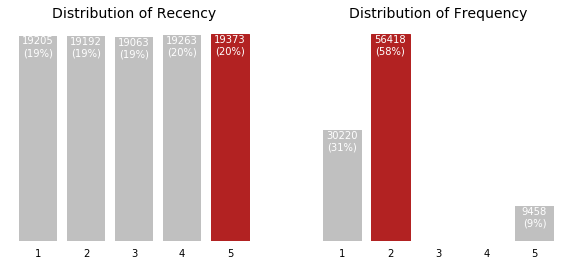

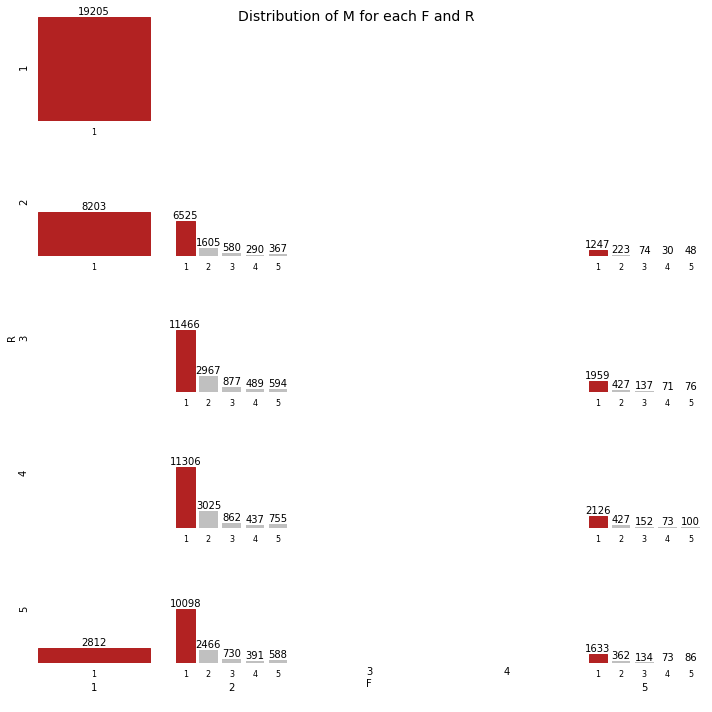

In [14]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

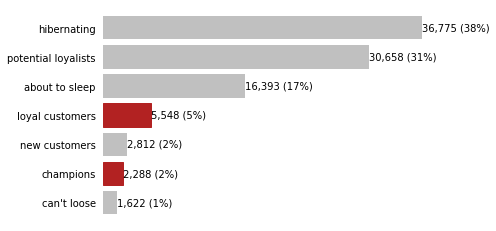

In [15]:

# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

# PCA

Creation of a transformation of the initial data set into a 2 variables composed PCA.

In [16]:
complete_upd_customers

,tot_spent,number_items_bought,number_orders,did_comment,review_score,delivery_days,january,february,march,april,...,Fashion,HealthNBeauty,SportsHobbies,Kids,HomeNGarden,Service,Food,Equipment,Pet,Construction
16606,4.092677,1.098612,1,1.0,1.0,3.433987,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
61883,4.316154,0.000000,1,0.0,5.0,2.890372,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
56965,4.498698,0.000000,1,0.0,5.0,2.079442,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
63218,3.555348,0.000000,1,1.0,5.0,1.098612,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
61101,3.758872,0.000000,1,1.0,2.0,3.091042,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,3.826465,0.000000,1,1.0,5.0,2.484907,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
57657,5.061962,0.000000,1,0.0,5.0,1.945910,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
80028,3.911823,0.000000,1,1.0,5.0,2.944439,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
942,3.910021,0.000000,1,1.0,4.0,2.079442,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [18]:
df_PCA = complete_upd_customers
#df_PCA = df.drop([df.columns[0]], axis = 'columns')
features = df_PCA.columns[:]

x = df_PCA.loc[:, features].values

In [19]:
min_max_scaler = MinMaxScaler()
x = StandardScaler().fit_transform(x)  # normalizing the features

df_normalized = pd.DataFrame(x, columns=features)
#complete_upd_customers = df_normalized.join(df_dummies)

In [20]:
df_PCA_months = complete_upd_customers[months]
df_PCA_categories = complete_upd_customers[Categories_name]

x_months = df_PCA_months.loc[:, months].values
x_categories = df_PCA_categories.loc[:, Categories_name].values

x_months = StandardScaler().fit_transform(x_months)
x_categories = StandardScaler().fit_transform(x_categories)

df_normalized_months = pd.DataFrame(x_months, columns=months)
df_normalized_categories = pd.DataFrame(x_categories, columns=Categories_name)

df_pca_months = pd.DataFrame(PCA(n_components=7).fit_transform(x_months))
df_pca_categories = pd.DataFrame(PCA(n_components=8).fit_transform(x_categories))

pca_month_list = []
pca_categories_list = []
for i in range(len(df_pca_months.columns)):
    pca_month_list

vfunc_month = np.vectorize(lambda x:"{} month pca".format(x))
df_pca_months.columns = vfunc_month(df_pca_months.columns.values)

vfunc_categories = np.vectorize(lambda x:"{} cat pca".format(x))
df_pca_categories.columns = vfunc_categories(df_pca_categories.columns.values)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [21]:
modified_PCA_customers = complete_upd_customers.drop(months, axis = 1).drop(Categories_name, axis = 1)

modified_PCA_customers = modified_PCA_customers.join(df_pca_months)
modified_PCA_customers = modified_PCA_customers.join(df_pca_categories)
modified_PCA_customers.fillna(0, inplace = True)

In [22]:

#x = StandardScaler().fit_transform(x)  # normalizing the features

#df_normalized = pd.DataFrame(x, columns=features)

trans_modified_PCA_customers = pd.DataFrame(StandardScaler().fit_transform(modified_PCA_customers), columns = modified_PCA_customers.columns)
trans_modified_PCA_customers


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



,tot_spent,number_items_bought,number_orders,did_comment,review_score,delivery_days,recency,frequency_column,monetary_column,0 month pca,...,5 month pca,6 month pca,0 cat pca,1 cat pca,2 cat pca,3 cat pca,4 cat pca,5 cat pca,6 cat pca,7 cat pca
0,-0.266485,2.900075,-0.162368,1.184082,-2.267247,1.539487,-0.276541,2.548574,-0.166054,-0.261989,...,-1.149631,0.065764,1.552083,0.051528,-0.039536,-0.026656,0.017042,-0.104062,0.034184,-0.020466
1,-0.042083,-0.381512,-0.162368,-0.850644,0.687311,0.842787,-0.181683,0.190097,-0.075759,-1.003644,...,-0.002601,0.066252,1.552083,0.051528,-0.039536,-0.026656,0.017042,-0.104062,0.034184,-0.020466
2,0.141215,-0.381512,-0.162368,-0.850644,0.687311,-0.196505,-0.105796,0.190097,0.014535,-0.778889,...,-1.658995,-0.156489,-0.642900,-0.751649,1.957710,-1.762868,0.411321,-0.539463,0.107966,-0.096229
3,-0.806035,-0.381512,-0.162368,1.184082,0.687311,-1.453541,-0.725537,0.190097,-0.315944,2.195277,...,-0.483881,0.213775,1.552083,0.051528,-0.039536,-0.026656,0.017042,-0.104062,0.034184,-0.020466
4,-0.601670,-0.381512,-0.162368,1.184082,-1.528607,1.099967,-1.345278,0.190097,-0.268389,1.204368,...,-0.140302,0.174611,-0.328513,-0.149504,0.050206,0.312616,0.133487,0.775633,-0.445066,0.566003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,-0.533797,-0.381512,-0.162368,1.184082,0.687311,0.323141,0.735280,-0.989141,-0.526632,1.204368,...,-0.140302,0.174611,-0.378952,-0.124477,-0.018084,0.072106,-0.170788,0.617846,-0.151547,0.630190
96092,0.706808,-0.381512,-0.162368,-0.850644,0.687311,-0.367640,-1.187180,0.190097,0.423872,1.204368,...,-0.140302,0.174611,-0.464225,-0.039359,0.136445,0.140495,-0.160700,2.226761,-3.474351,-2.005268
96093,-0.448086,-0.381512,-0.162368,1.184082,0.687311,0.912080,1.203248,-0.989141,-0.526632,2.195277,...,-0.483881,0.213775,-0.519480,-0.171120,0.013106,0.204440,-0.101310,2.957481,3.014498,-1.156425
96094,-0.449896,-0.381512,-0.162368,1.184082,-0.051328,-0.196505,-0.548468,0.190097,-0.226251,-1.029659,...,-0.684435,0.128684,-0.699838,-1.355861,-2.137187,-0.745479,0.121442,-0.567311,0.008697,-0.108639


In [23]:
modified_PCA_customers.isna().any(axis = 1).value_counts()

False    96096
dtype: int64

In [24]:
Flag = False

filename = "./Data_Safe/PCA.txt"
filename_trans = "./Data_Safe/PCA_trans.txt"



if(Flag):
    print("Calculating..............")
    print("Calculating..............")
    print("Calculating..............")
    
    pca = PCA(n_components=2).fit(x)
    pca_trans = PCA(n_components=2).fit(modified_PCA_customers)

    
    joblib.dump(pca, filename)
        
    print("Done ! ")

else: 
    pca = joblib.load(filename)
    
    print("Loaded the file!")
    


Loaded the file!


In [25]:
print(pca.explained_variance_ratio_.cumsum())

[0.06128842 0.10819405]


plt.plot(board)
plt.xlabel("# of features")
plt.ylabel("ratio of unretained variance")
plt.title("PCA variance analysis", fontname="Arial Black", size=15)

In [26]:
X_transformed_PCA = pca.transform(x)

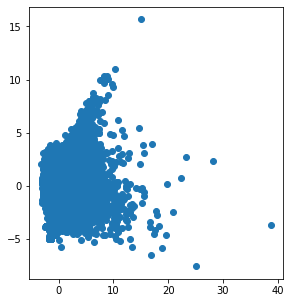

In [27]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121)
ax.scatter(X_transformed_PCA[:,0], X_transformed_PCA[:,1])

In [28]:
pcs = pca.components_

In [29]:
pcs_short = pcs[:,:6]

In [30]:
print(features[:6])
print(features[-29:-17])

Index(['tot_spent', 'number_items_bought', 'number_orders', 'did_comment',
       'review_score', 'delivery_days'],
      dtype='object')
Index(['january', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december'],
      dtype='object')


In [31]:
pcs_short_month = pcs[:,-15:-3]

pcs_tot = [pcs_short[:], pcs_short_month[:]]
feature_tot = [complete_upd_customers.columns[:6].values[:], features[-15:-3].values[:][:]]

In [32]:
pcs_tot = [[], []]
for i in range(2):
    pcs_line = []
    for values in pcs_short[i,:]:
        pcs_line.append(values)
    
    for values in pcs_short_month[i,:]:
        pcs_line.append(values)
    pcs_tot[i] = pcs_line
pcs_tot = np.array(pcs_tot)

In [33]:
pcs_short_month[0]

array([ 0.33964799, -0.06934872,  0.01433987,  0.0381669 , -0.0025694 ,
        0.05134069,  0.00089909,  0.02079695, -0.06311867,  0.14479107,
       -0.00688418,  0.01878954])

In [34]:
feature_tot = []
for values in complete_upd_customers.columns[:6].values:
    feature_tot.append(values)

for values in features[-15:-3].values:
    feature_tot.append(values)

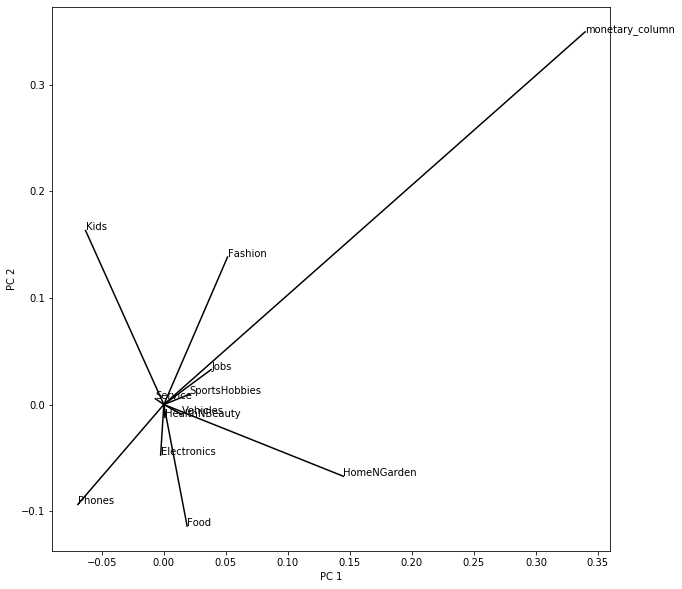

In [35]:
fig = plt.figure(figsize=(10,10))

for i, (x, y) in enumerate(zip(pcs_short_month[0,:], pcs_short_month[1,:])):
    plt.plot([0,x], [0, y], color='k')
    plt.text(x,y, features[-15:-3].values[i])
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

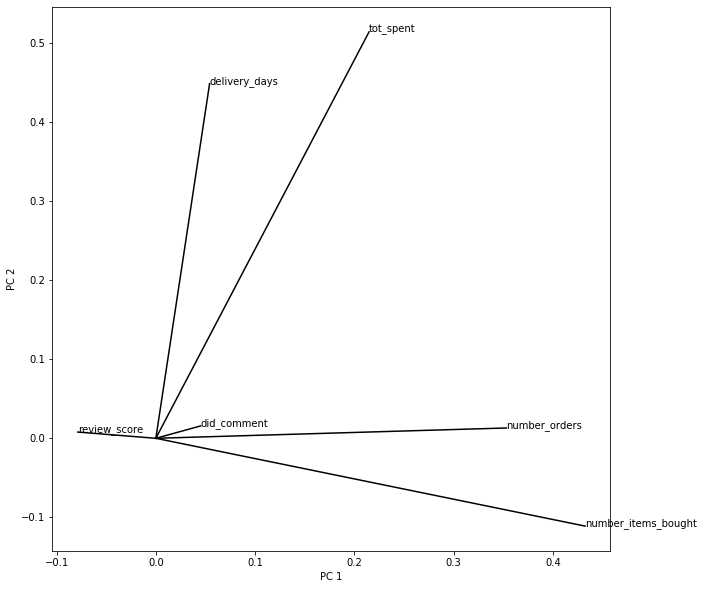

In [36]:
fig = plt.figure(figsize=(10,10))

for i, (x, y) in enumerate(zip(pcs_short[0,:], pcs_short[1,:])):
    plt.plot([0,x], [0, y], color='k')
    plt.text(x,y, complete_upd_customers.columns[i])
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))

for i, (x, y) in enumerate(zip(pcs_tot[0,:], pcs_tot[1,:])):
    plt.plot([0,x], [0, y], color='k')
    plt.text(x,y, feature_tot[i])
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 8))

for i in range(6):
    j = i+1
    ax = fig.add_subplot(2, 3, j)
    colorCat = complete_upd_customers.columns[i]
    plt.title(colorCat)
    ax.scatter(X_transformed_PCA[:,0],
               X_transformed_PCA[:,1],
               cmap=plt.cm.Spectral,
               c=complete_upd_customers.get(colorCat),
               alpha = 0.5)
    plt.axis('tight')

In [ ]:
fig = plt.figure(figsize=(15, 15))

for i in range(12):
    j = i+1
    ax = fig.add_subplot(4, 3, j)
    month = months[i]
    colorCat = months[i]
    plt.title(colorCat)
    ax.scatter(X_transformed_PCA[:,0],
               X_transformed_PCA[:,1],
               cmap=plt.cm.Spectral,
               c=complete_upd_customers.get(colorCat),
               alpha = 0.9)
    plt.axis('tight')

# LLE 

Creation of a transformation of the initial data set into a 2 variables composed LLE.

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
Flag = False

filename = "./Data_Safe/LLE.txt"

if(Flag):
    print("Calculating..............")
    print("Calculating..............")
    print("Calculating..............")

    X_transformed_LLE = LocallyLinearEmbedding(n_components=2).fit_transform(df_PCA.loc[:, features].values)

    joblib.dump(X_transformed_LLE, filename)

    print("Done !")

else: 
    X_transformed_LLE = joblib.load(filename)
    print("Loaded the file")

In [ ]:
fig = plt.figure(figsize=(15, 8))

for i in range(6):
    j = i+1
    ax = fig.add_subplot(2, 3, j)
    colorCat = complete_upd_customers.columns[i]
    plt.title(colorCat)
    ax.scatter(X_transformed_LLE[:, 0],
               X_transformed_LLE[:, 1],
               cmap=plt.cm.Spectral,
               c=complete_upd_customers.get(colorCat))
    plt.axis('tight')

# kMean

In [ ]:
from sklearn import cluster, metrics, decomposition
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

## Clustering

In [37]:
cls_complete = cluster.KMeans(n_clusters = 3, n_init = 1, init='random', random_state = 42).fit(df_normalized)

In [304]:
print("silhouette score : %.3f" % metrics.silhouette_score(df_normalized, cls_complete.labels_))

silhouette score : 0.066


1.507260000705719  minutes.


## Performance

In [52]:
#Comparative silhouette score for progressing K values
silhouettes = []

for num_clusters in range(2,10):       
    cls = cluster.KMeans(n_clusters = num_clusters, n_init = 1, init='random', random_state = 42)
    
    cls.fit(df_normalized)
    silh = metrics.silhouette_score(df_normalized, cls.labels_)
    silhouettes.append(silh)

KeyboardInterrupt: 

9.964849738279979  minutes.


In [ ]:
plt.plot(range(2,10), silhouettes, marker='o')

In [ ]:
#Comparison of percentage of variance explained for progressing K values

K_MAX = 25
KK = range(1,K_MAX+1)
X = df_normalized

KM = [kmeans(X,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares

##### plots #####
kIdx = 9        # K=10
#clr = cm.spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

## Analysis

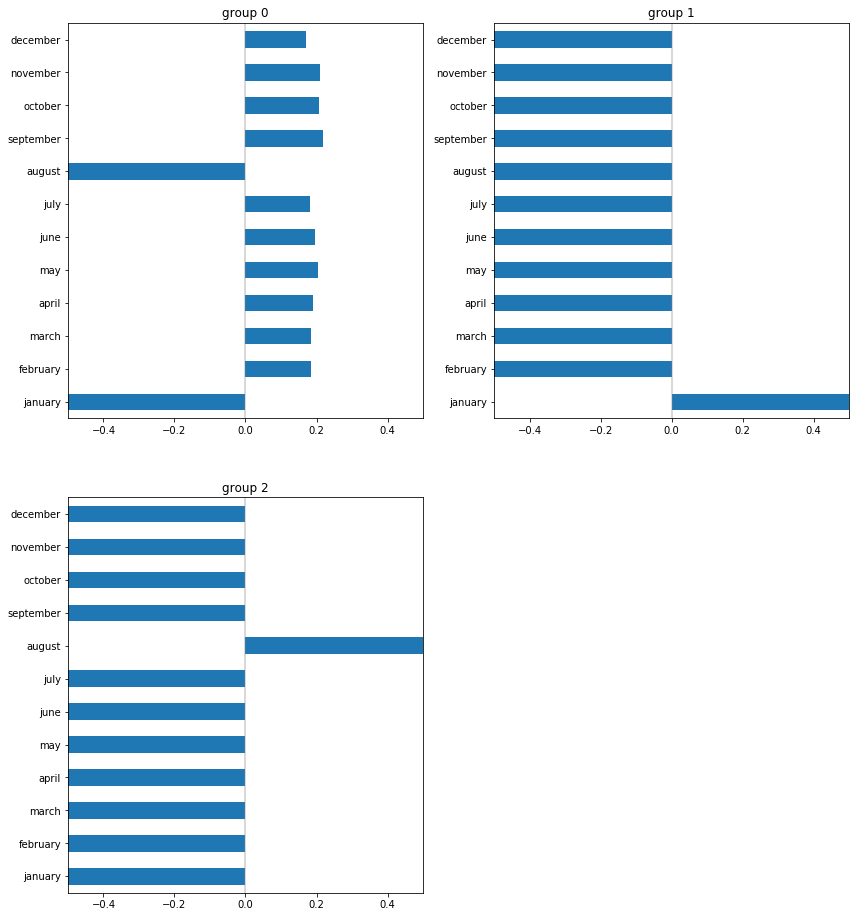

In [38]:
#This is the best one to inform about the behaviors of each group during the months

#It shows the pourcentage above or below their mean number of orders
# eg : Group 1 has an mean number of orders of 1.0004 around the year, 
#      but in january shows a 172% increase of mean orders passed.
#      Group 2 has a pretty well dispersed concentration of orders passed 
#      around the year (with the exception of september)


Month_bar(complete_upd_customers, cls_complete, 3)

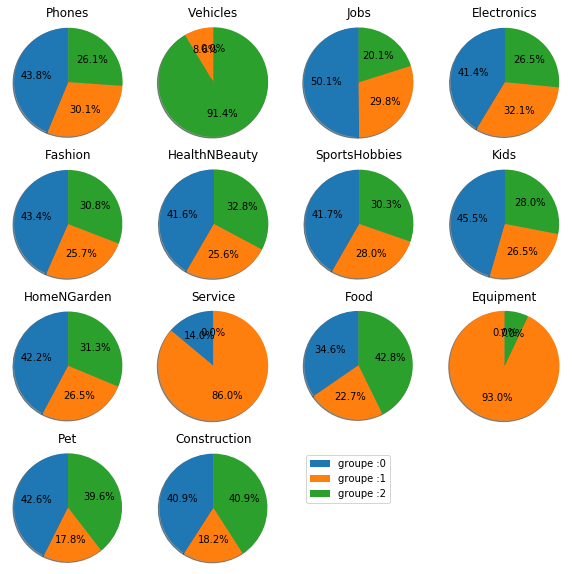

In [39]:
Product_Pie(complete_upd_customers, cls_complete, 3)

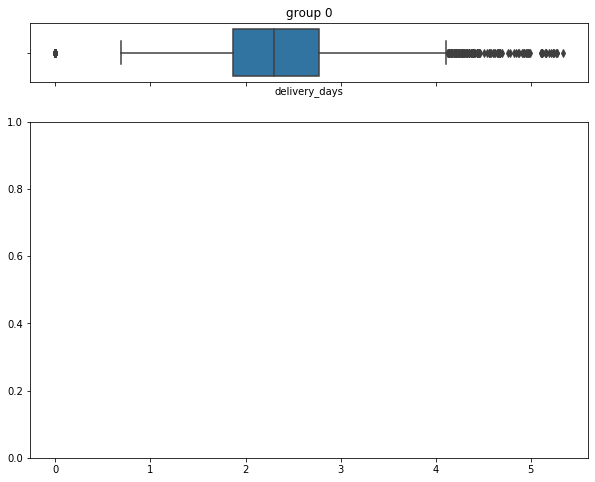

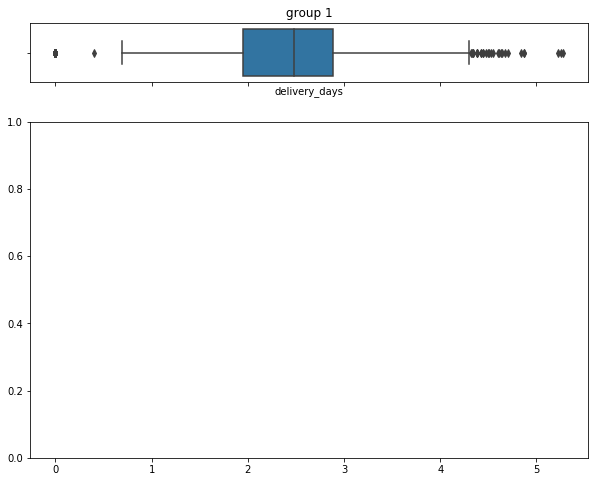

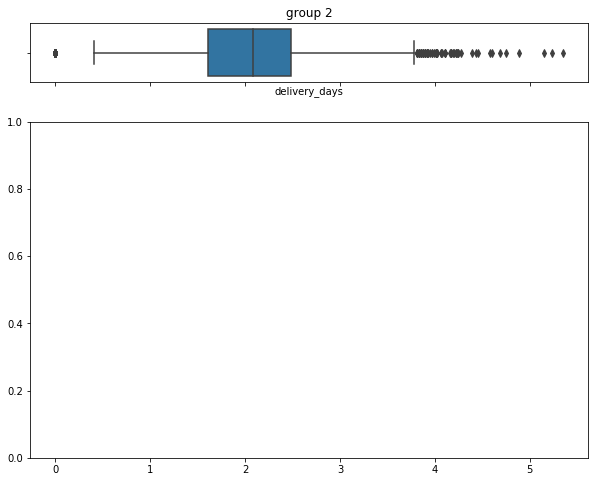

In [40]:
#print(complete_upd_customers.groupby(cls_complete.labels_).get_group())
i = 0
for g_values in complete_upd_customers.groupby(cls_complete.labels_):
#    data = pd.DataFrame(groups[0], columns = ["datac"])
#    print(data["datac"])
#    binNumb = int(np.ceil(1 + np.log2(len(data["datac"]))))
#    a4_dims = (15, 11)
#    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=a4_dims)
#    ax1 = sns.boxplot(data["datac"], ax=ax_box)
#    ax2 = sns.distplot(data["datac"])
    data = pd.DataFrame(g_values[1], columns = complete_upd_customers.columns)
    data = data.apply(lambda x : x)
    
    binNumb = int(np.ceil(1 + np.log2(len(data))))
    a4_dims = (10, 8)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=a4_dims)
    ax1 = sns.boxplot(data["delivery_days"], ax=ax_box).set_title("group %d" % i)
    #ax2 = sns.distplot(data["tot_spent"])
    
    i+=1

(-5.426416474321278, 40.91570008707075, -8.755705134824618, 16.83131479330625)

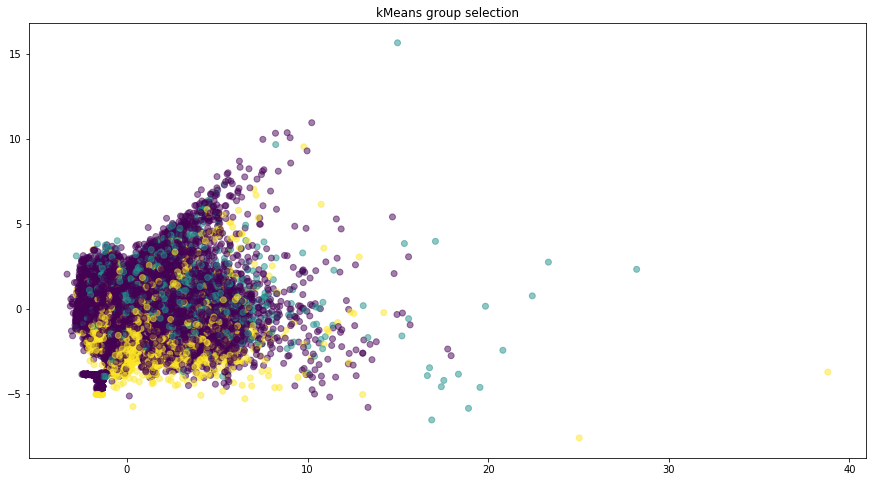

In [41]:
fig = plt.figure(figsize=(15, 8))


plt.title("kMeans group selection")
plt.scatter(X_transformed_PCA[:,0],
           X_transformed_PCA[:,1],
           c=cls_complete.labels_,
           alpha = 0.5)
plt.axis('tight')

(-0.07262570875632095,
 0.04282618983202358,
 -0.057047932272836416,
 0.05002170362214367)

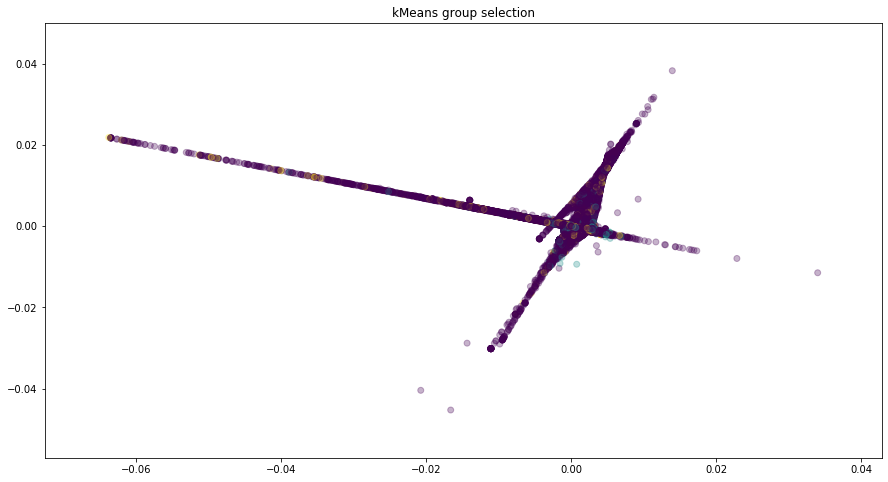

In [42]:
fig = plt.figure(figsize=(15, 8))


plt.title("kMeans group selection")
plt.scatter(X_transformed_LLE[:,0],
           X_transformed_LLE[:,1],
           c=cls_complete.labels_,
           alpha = 0.3)
plt.axis('tight')

Group 0


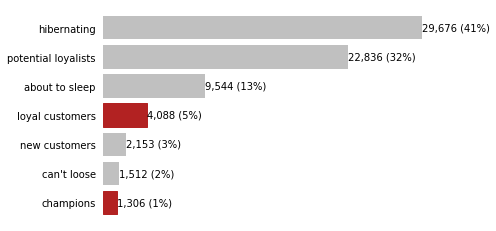

Group 1


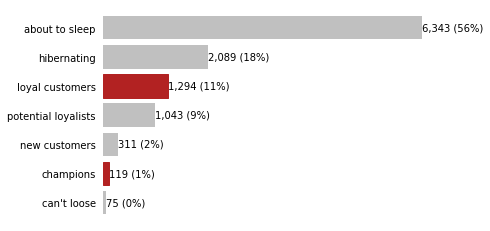

Group 2


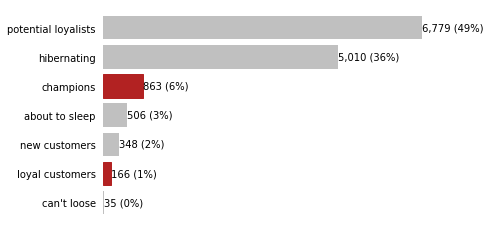

In [43]:
#RFM Analysis for each cluster of kMean

for idx, groups_idx in complete_upd_customers.groupby(cls_complete.labels_).groups.items() : 
    #rfm_calc(complete_upd_customers.loc[groups_idx])
    #rfm_data_compare(complete_upd_customers.loc[groups_idx], complete_upd_customers)
    print("Group %d" % idx)
    rfm_data_compare(complete_upd_customers.loc[groups_idx])



# HDBSCAN

In [44]:
import hdbscan

plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

## Clustering

In [45]:
Flag = False
filename = "./Data_Safe/HDBSCAN_7.txt"

#clusterer = hdbscan.HDBSCAN(min_cluster_size=4000, min_samples=1) => hdbscan_test.labels_.max() = 10
#clusterer = hdbscan.HDBSCAN(min_cluster_size=6000, min_samples=1) => hdbscan_test.labels_.max() = 8
#clusterer = hdbscan.HDBSCAN(min_cluster_size=6000, min_samples=2)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=7000, min_samples=2) => hdbscan_test.labels_.max() = 5
#clusterer = hdbscan.HDBSCAN(min_cluster_size=7100, min_samples=2) => hdbscan_test.labels_.max() = 4
#clusterer = hdbscan.HDBSCAN(min_cluster_size=6500, min_samples=2) => hdbscan_test.labels_.max() = 7

if(Flag):
    print("Calculating..............")
    print("Calculating..............")
    print("Calculating..............")
    
    #8 clusters
    hdbscan_7 = hdbscan.HDBSCAN(min_cluster_size=6500, min_samples=2).fit(df_normalized)

    joblib.dump(hdbscan_7, filename)

    print("Done !")

else: 
    hdbscan_7 = joblib.load(filename)
    print("Loaded the file")

Loaded the file


In [46]:
np.max(hdbscan_7.labels_)

7

In [47]:
Flag = False
filename = "./Data_Safe/HDBSCAN_mod_7.txt"

#4000, 1 => 1
#6500, 2 => 3
#6000, 2 => 4
#5000, 2 => 5
#4500, 2 => 6
#4400, 2 => 6
#4350, 2 => 7
#4300, 2 => 8
#4000, 2 => 1

if(Flag):
    print("Calculating..............")
    print("Calculating..............")
    print("Calculating..............")
    
    #15 clusters
    hdbscan_mod_7 = hdbscan.HDBSCAN(min_cluster_size=4350, min_samples=2).fit(trans_modified_PCA_customers)

    joblib.dump(hdbscan_mod_7, filename)

    print("Done !")

else: 
    hdbscan_mod_7 = joblib.load(filename)
    print("Loaded the file")

Loaded the file


## Analysis

In [48]:
#Number of values in cluster
cluster_values = complete_upd_customers.groupby(hdbscan_7.labels_).describe().loc[-1][0]
total_values = complete_upd_customers.shape[0]
print((total_values - cluster_values)/total_values * 100, "%")

61.908924408924406 %


In [49]:
#Number of values in cluster
cluster_values = complete_upd_customers.groupby(hdbscan_mod_7.labels_).describe().loc[-1][0]
total_values = complete_upd_customers.shape[0]
print((total_values - cluster_values)/total_values * 100, "%")

68.88424075924075 %


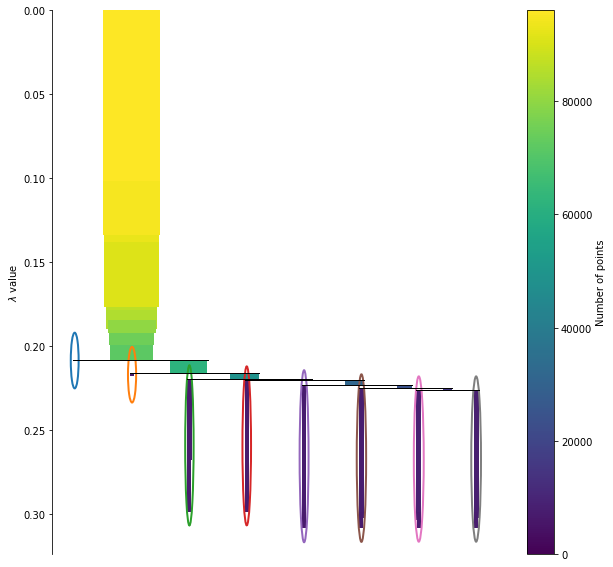

In [50]:
fig = plt.figure(figsize=(10, 10))

hdbscan_7.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

(-5.426416474321278, 40.91570008707075, -8.755705134824618, 16.83131479330625)

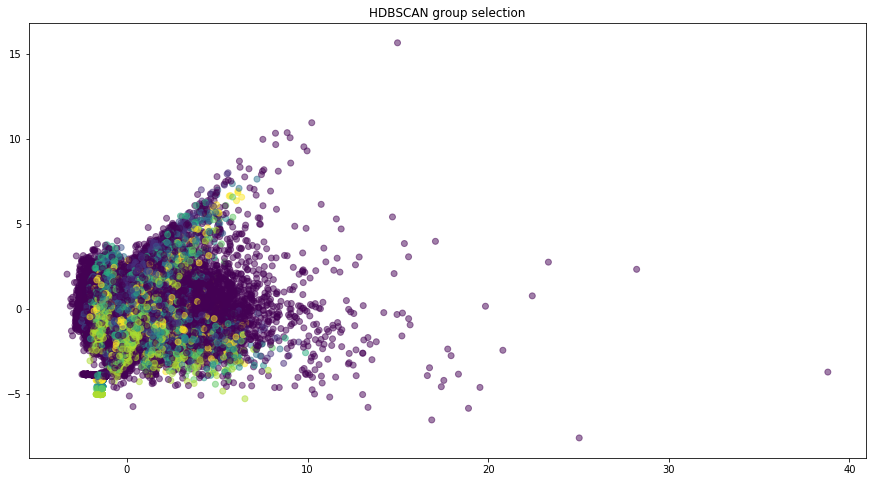

In [51]:
fig = plt.figure(figsize=(15, 8))


plt.title("HDBSCAN group selection")
plt.scatter(X_transformed_PCA[:,0],
           X_transformed_PCA[:,1],
           c=hdbscan_7.labels_,
           alpha = 0.5)
plt.axis('tight')

(-0.07262570875632095,
 0.04282618983202358,
 -0.057047932272836416,
 0.05002170362214367)

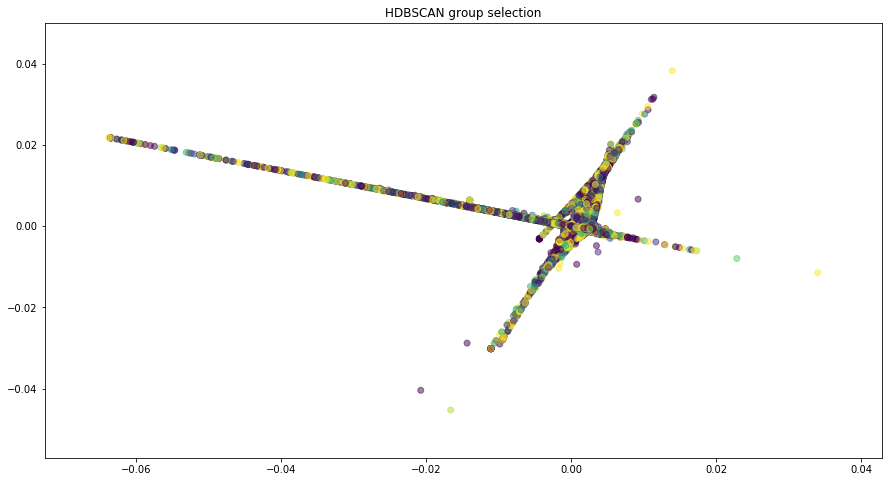

In [52]:
fig = plt.figure(figsize=(15, 8))


plt.title("HDBSCAN group selection")
plt.scatter(X_transformed_LLE[:,0],
           X_transformed_LLE[:,1],
           c=hdbscan_mod_7.labels_,
           alpha = 0.5)
plt.axis('tight')

In [53]:
complete_upd_customers.groupby(hdbscan_mod_7.labels_).agg("mean")

,tot_spent,number_items_bought,number_orders,did_comment,review_score,delivery_days,january,february,march,april,...,Fashion,HealthNBeauty,SportsHobbies,Kids,HomeNGarden,Service,Food,Equipment,Pet,Construction
-1,4.426708,0.193997,1.111869,0.420377,4.073802,2.243301,0.092405,0.095616,0.108491,0.104980,...,0.101301,0.131099,0.110197,0.110899,0.320959,0.000033,0.011237,0.046019,0.018327,0.020702
0,4.304827,0.098101,1.000000,0.425995,4.046797,2.225720,0.076026,0.085510,0.098881,0.095149,...,0.088308,0.126555,0.093128,0.097792,0.272699,0.000000,0.009795,0.043377,0.016791,0.020833
1,4.338026,0.094780,1.000000,0.410157,4.072827,2.232306,0.079880,0.083759,0.101040,0.092753,...,0.085346,0.117440,0.090284,0.108623,0.268912,0.000000,0.007759,0.044966,0.018692,0.020102
2,4.321320,0.102312,1.000000,0.412843,4.050358,2.226343,0.079559,0.084178,0.098182,0.094160,...,0.086412,0.120381,0.096246,0.110697,0.272348,0.000000,0.008492,0.047080,0.016985,0.017133
3,4.344971,0.094305,1.000000,0.414810,4.058993,2.232058,0.086840,0.079002,0.097979,0.089315,...,0.090965,0.117368,0.099216,0.116337,0.268358,0.000000,0.009282,0.043111,0.017533,0.019389
4,4.340001,0.101640,1.000000,0.416785,4.051387,2.220376,0.081081,0.091572,0.105619,0.091038,...,0.092105,0.128378,0.096550,0.105441,0.271871,0.000000,0.010313,0.040541,0.017603,0.017070
5,4.324875,0.100506,1.000000,0.415432,4.087075,2.206997,0.078869,0.079553,0.095509,0.092774,...,0.092090,0.125826,0.087531,0.097789,0.287212,0.000000,0.009118,0.046729,0.015956,0.018920
6,4.327425,0.096375,1.000000,0.423965,4.079051,2.239805,0.087165,0.084460,0.100270,0.094654,...,0.092781,0.122738,0.095070,0.109632,0.267110,0.000000,0.008737,0.043478,0.019139,0.015602
7,4.325882,0.096874,1.000000,0.416829,4.075124,2.230192,0.078949,0.086815,0.101429,0.094790,...,0.091506,0.119290,0.093346,0.104929,0.275096,0.000036,0.010572,0.044671,0.017175,0.018763


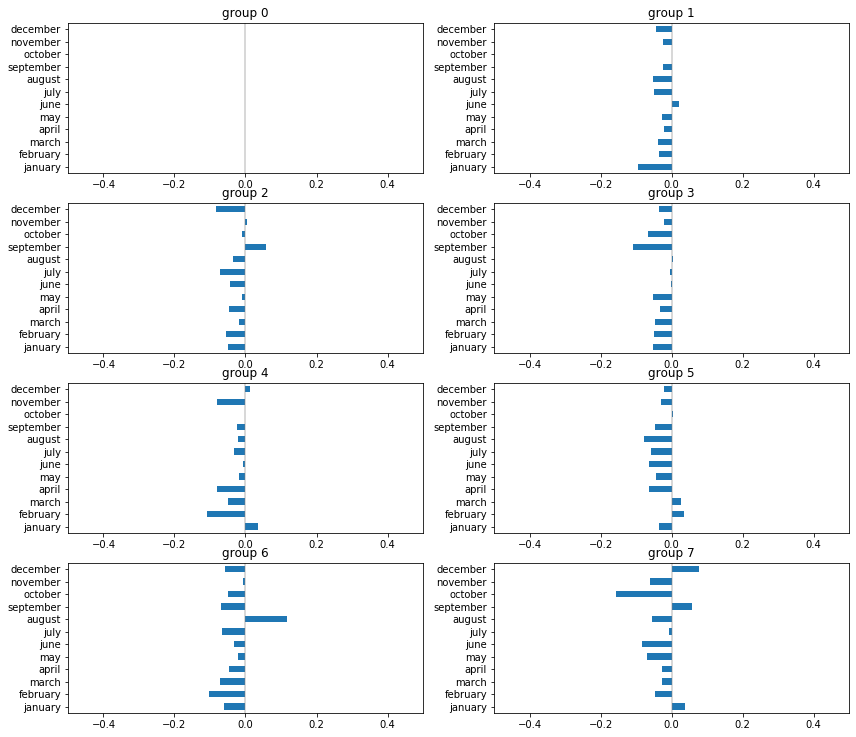

In [54]:
#This is the best one to inform about the behaviors of each group during the months

#It shows the pourcentage above or below their mean number of orders
# eg : Group 1 has an mean number of orders of 1.0004 around the year, 
#      but in november shows a 172% increase of mean orders passed.
#      Group 2 has a pretty well dispersed concentration of orders passed 
#      around the year (with the exception of september)


Month_bar(complete_upd_customers, hdbscan_mod_7, np.max(hdbscan_mod_7.labels_)+1)

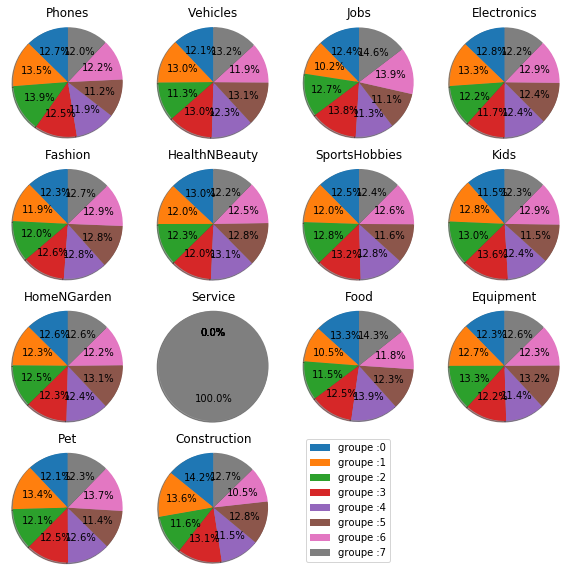

In [55]:
Product_Pie_HDBSCAN(complete_upd_customers, hdbscan_mod_7, np.max(hdbscan_mod_7.labels_)+1)

Group -1


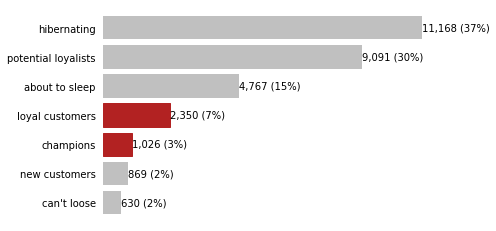

Group 0


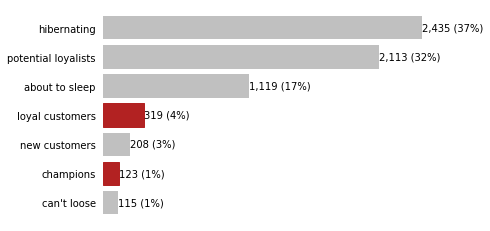

Group 1


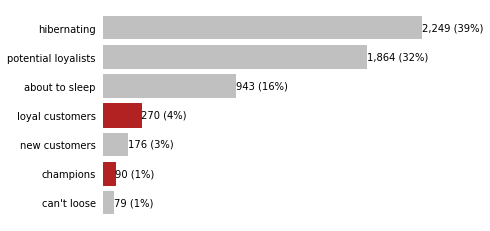

Group 2


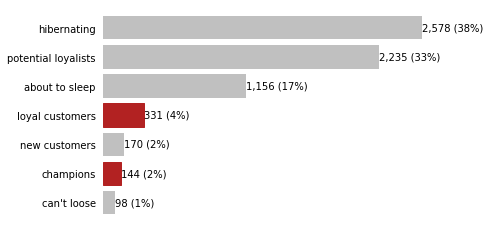

Group 3


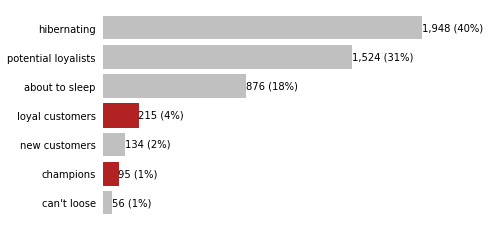

Group 4


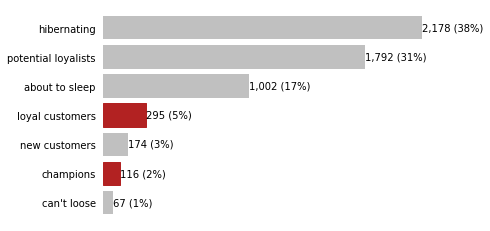

Group 5


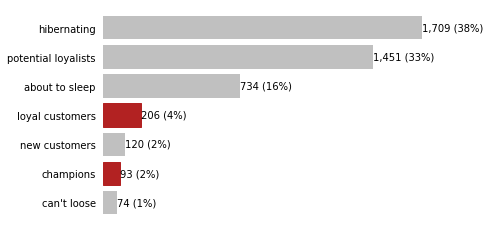

Group 6


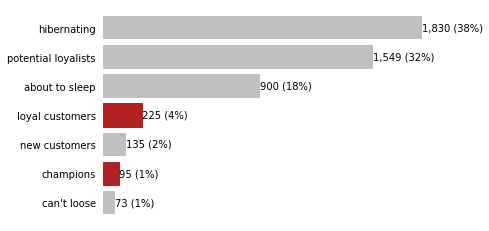

Group 7


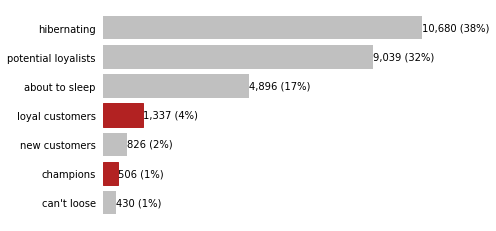

In [56]:
for idx, groups_idx in complete_upd_customers.groupby(hdbscan_mod_7.labels_).groups.items() : 
    #rfm_calc(complete_upd_customers.loc[groups_idx])
    #rfm_data_compare(complete_upd_customers.loc[groups_idx], complete_upd_customers)
    print("Group %d" % idx)
    rfm_data_compare(complete_upd_customers.loc[groups_idx])


